In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/raw/Prices.csv")
df.head()

,Date,AAPL,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,PG,XOM
0,2015-01-02,24.237549,15.4260,26.278944,76.955551,46.511124,77.905800,39.858452,0.483011,66.518349,57.916889
1,2015-01-05,23.554735,15.1095,25.778227,76.418083,45.067196,76.654541,39.491920,0.474853,66.202065,56.332203
2,2015-01-06,23.556952,14.7645,25.142035,76.042580,43.898651,75.621750,38.912289,0.460457,65.900513,56.032726
3,2015-01-07,23.887281,14.9210,25.068092,77.721291,43.965630,75.621750,39.406689,0.459257,66.246216,56.600468
4,2015-01-08,24.805077,15.0230,25.155436,78.332405,44.948116,77.637688,40.565952,0.476533,67.003761,57.542580


In [ ]:
df.shape
#The dataset contains 2,765 daily observations and 10 numerical stock price variables, providing sufficient dimensionality for multivariate analysis.

(2765, 11)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2765 non-null   object 
 1   AAPL    2765 non-null   float64
 2   AMZN    2765 non-null   float64
 3   GOOGL   2765 non-null   float64
 4   JNJ     2765 non-null   float64
 5   JPM     2765 non-null   float64
 6   META    2765 non-null   float64
 7   MSFT    2765 non-null   float64
 8   NVDA    2765 non-null   float64
 9   PG      2765 non-null   float64
 10  XOM     2765 non-null   float64
dtypes: float64(10), object(1)
memory usage: 237.7+ KB


In [ ]:
df.isnull().sum()
#No missing values were detected, simplifying preprocessing for subsequent modeling tasks.

Date     0
AAPL     0
AMZN     0
GOOGL    0
JNJ      0
JPM      0
META     0
MSFT     0
NVDA     0
PG       0
XOM      0
dtype: int64

In [7]:
df.describe()

,AAPL,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,PG,XOM
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,106.264792,111.714225,93.641694,124.893336,119.287875,261.113889,206.076353,32.758861,107.687909,68.824275
std,74.267900,61.701738,57.406736,29.992217,65.749924,173.768333,143.224672,49.786936,36.761664,25.336264
min,20.604078,14.347500,24.666626,68.278831,40.474892,73.536331,34.437153,0.459257,51.235596,24.145136
25%,36.648685,50.146999,49.221104,103.244370,74.627159,141.293015,68.781120,3.761119,69.111061,52.586971
50%,88.466438,99.740997,73.245079,125.980705,99.122780,188.840881,191.971481,9.494388,108.853691,57.200081
75%,168.632507,163.293503,133.716187,149.474976,140.479889,321.911316,312.366638,29.343159,141.079865,96.347748
max,286.190002,254.000000,323.228577,214.169998,327.691864,788.823792,541.057373,207.028473,175.074509,120.989998


In [11]:
df.columns


Index(['Date', 'AAPL', 'AMZN', 'GOOGL', 'JNJ', 'JPM', 'META', 'MSFT', 'NVDA',
       'PG', 'XOM'],
      dtype='object')

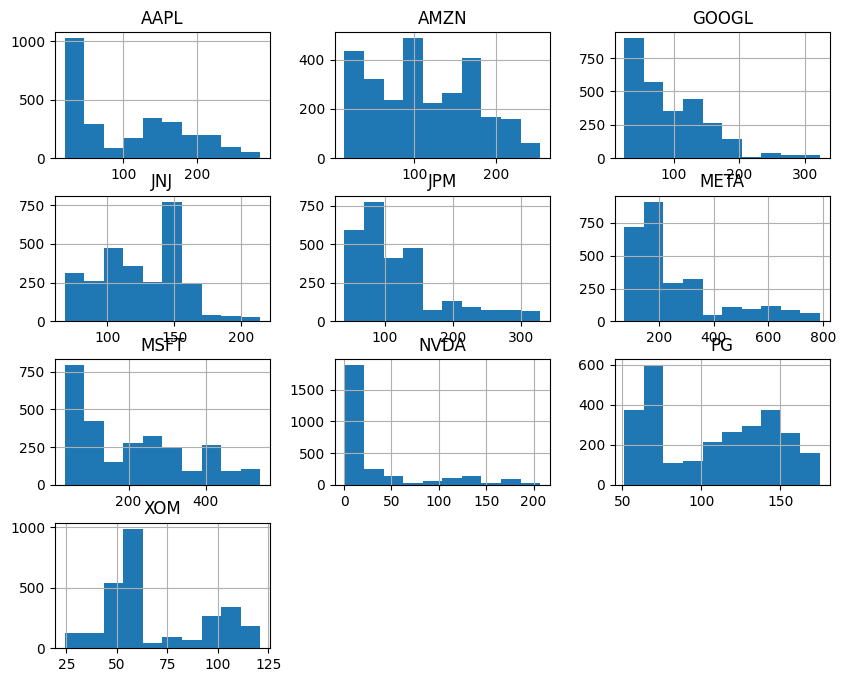

In [ ]:
df.select_dtypes(include=["number"]).hist(figsize=(10,8))
plt.show()
#Stock price distributions show positive skew and long-term upward trends, suggesting that normalization or transformation may be required before clustering or regression.


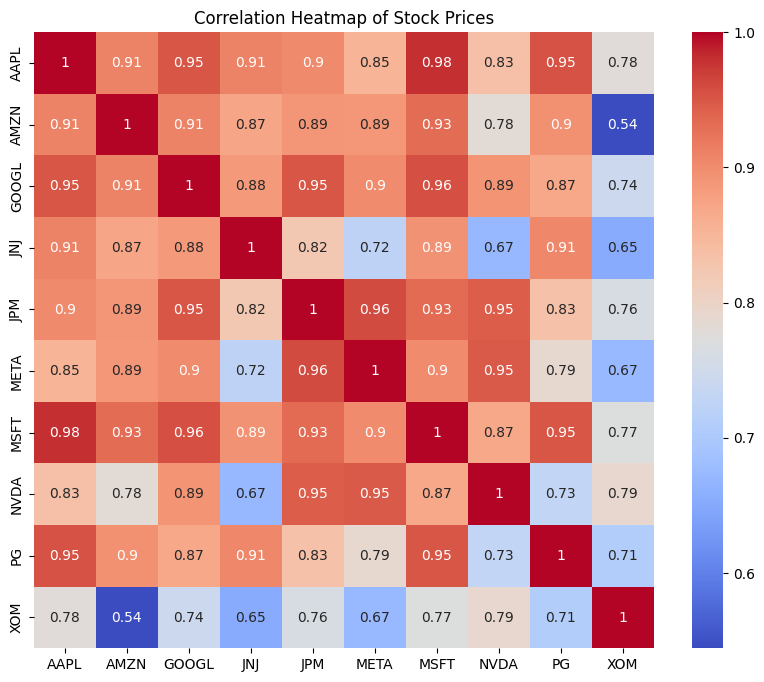

In [13]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()


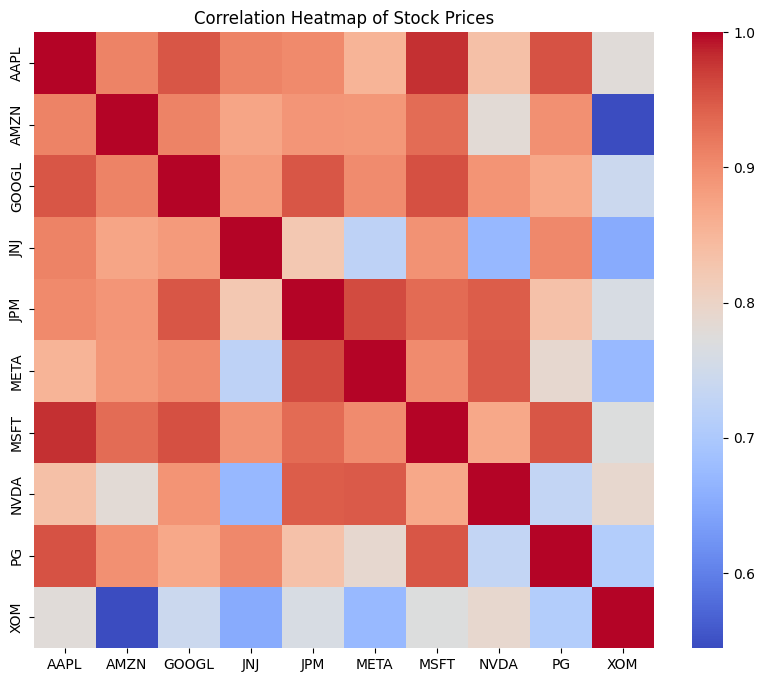

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()


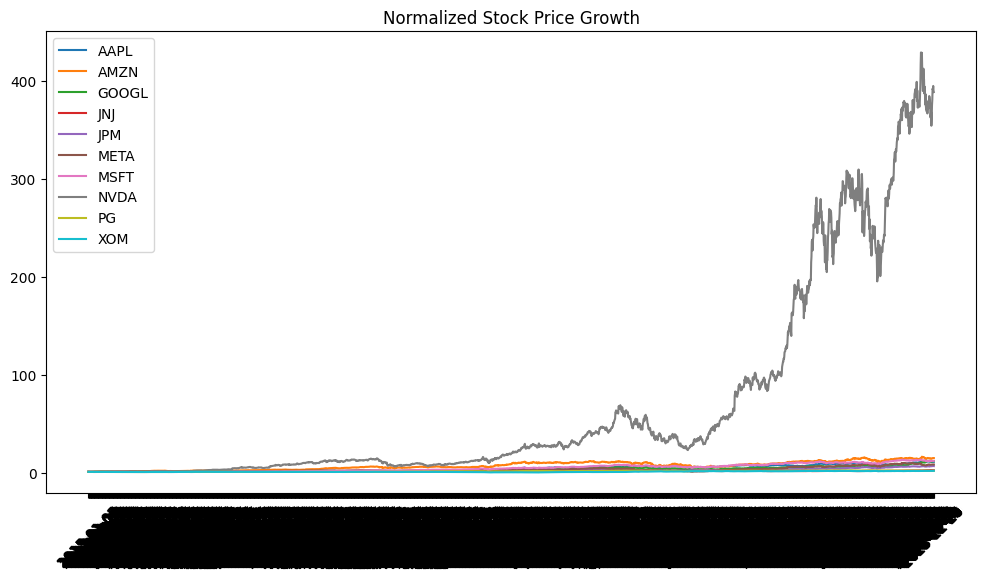

In [16]:
normalized = numeric_df / numeric_df.iloc[0]

plt.figure(figsize=(12,6))

for col in normalized.columns:
    plt.plot(df["Date"], normalized[col], label=col)

plt.xticks(rotation=45)
plt.title("Normalized Stock Price Growth")
plt.legend()
plt.show()
